In [ ]:
Variable Notes:-
pclass: Passenger class
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. 

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Sex:
    category type : male or female person
    
Ticket:
    this is ticket number

Fare:
    this is ticket amount of

Embarked:
    Embarked implies where the traveler mounted from.
    There are three possible values for Embark — Southampton (S), Cherbourg (C), and Queenstown (Q).

Survived:
    whether that person has survived or not?

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# how to read the dataset
df=pd.read_csv("/home/rupeshr/Downloads/Titanic.csv")

In [37]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# to check columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# to check data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
# shape the data
df.shape

(891, 12)

In [42]:
# print the top records 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#print the last records
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [43]:
#how to check missing data
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

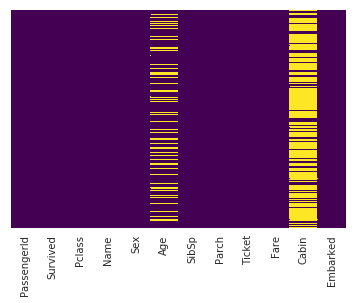

In [47]:
#visualize the data
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [51]:
df['Cabin'].isnull().sum()/891

0.7710437710437711

In [13]:
print('Percent of missing "Age" records is %.2f%%' %((df['Age'].isnull().sum()/df.shape[0])*100))

Percent of missing "Age" records is 19.87%


In [14]:
print('Percent of missing "Cabin" records is %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


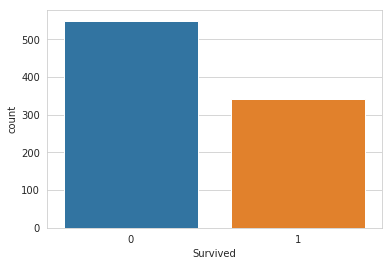

In [52]:
#count of survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

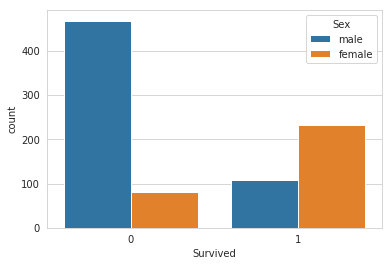

In [16]:
#count of survived of male/female
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=df)

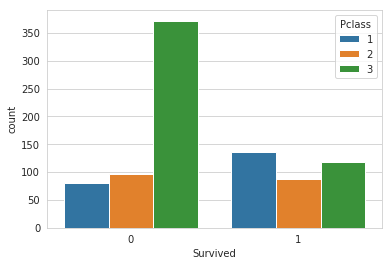

In [17]:
#count of survived of Pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=df)

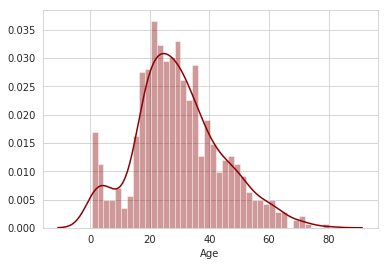

In [53]:
#distplot for age
sns.distplot(df['Age'].dropna(), kde=True, color='darkred', bins=40)

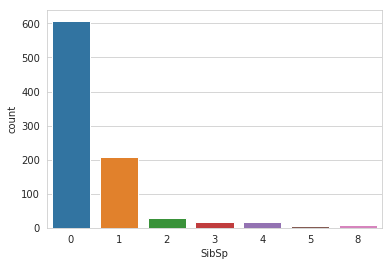

In [54]:
# count of sibbling/ Spouse
sns.countplot(x='SibSp', data=df)

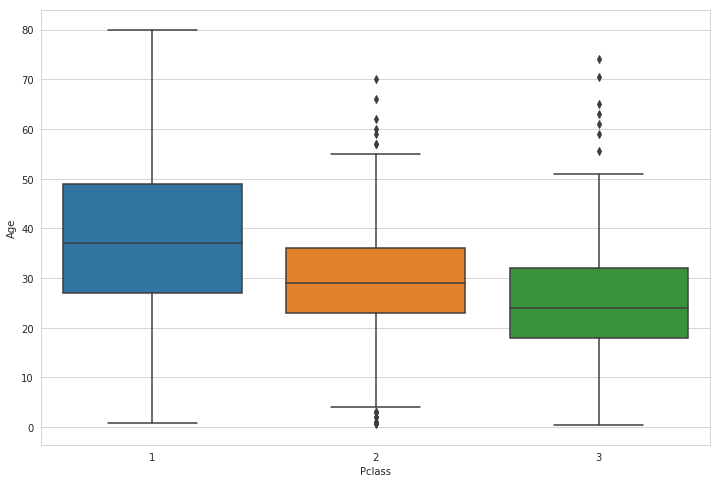

In [20]:
#Data cleaning
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=df) # quartile  deviation

In [73]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [74]:
df['Age']= df[['Age','Pclass']].apply(impute_age, axis=1)

In [75]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

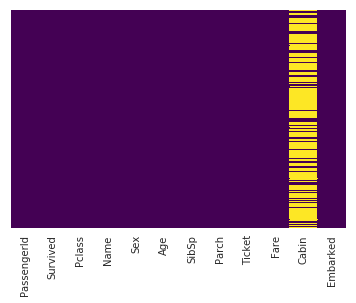

In [24]:
#check again in visual graph
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [76]:
df.drop('Cabin',axis=1, inplace=True)

In [77]:
df.dropna(inplace=True)

In [62]:
#Converting categorical features into numerical format

In [64]:
pd.get_dummies(df['Embarked'], drop_first=True).head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [78]:
embark=pd.get_dummies(df['Embarked'], drop_first=True)

In [79]:
gender=pd.get_dummies(df['Sex'], drop_first=True)

In [80]:
df.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [81]:
df=pd.concat([df,gender, embark], axis=1)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [83]:
#Correlations
Var_Corr = df.corr()

In [86]:
Var_Corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703,0.043136,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,-0.541585,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,0.127741,0.220558,0.076466
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,0.083730,-0.080875,0.013598
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,-0.116348,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,-0.247508,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,-0.179958,-0.116684,-0.163758
male,0.043136,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,1.000000,-0.075217,0.121405
Q,-0.033694,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,-0.075217,1.000000,-0.499261
S,0.022269,-0.151777,0.076466,0.013598,0.069438,0.061512,-0.163758,0.121405,-0.499261,1.000000


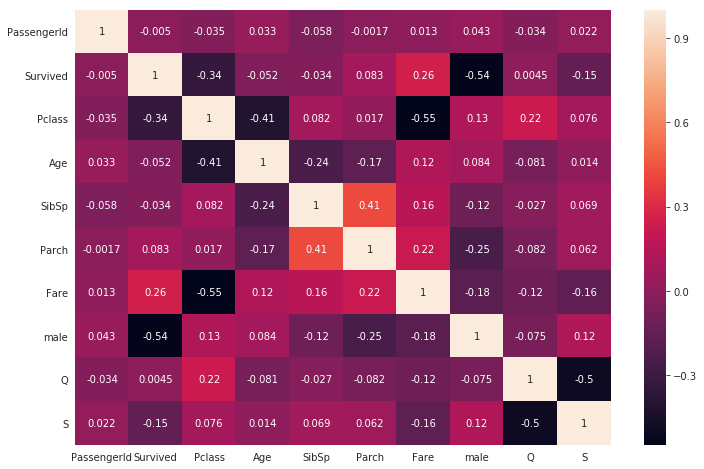

In [87]:
# plot the heatmap and annotation on it
plt.figure(figsize=(12,8))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)